In [5]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
data = pd.read_csv("./diabetes (2).csv")

In [7]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
#target = data['Outcome']
#data = data.drop(columns=['Outcome'])
#target
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [9]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

In [10]:
data
target = data['Outcome']
data = data.drop(columns=['Outcome'])

In [11]:
transfer = StandardScaler()#MinMaxScaler
#transfer = MinMaxScaler()
transfer_fit = transfer.fit_transform(data)
data_2 = pd.DataFrame(transfer_fit)
data_2.describe()
data_2['Outcome'] = target
data_2.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness',
              'Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data_2

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.468492  1.425995        1  
1                   -0.365061 -0.190672        0  
2                    0.604397 -0.105584        1  
3                   -0.920763 -1.041549        0  
4                    5.484909 -0.020496        1  
..                        ...       ...      ...  
763                 -0.908682  2.532136        0  
764                 -0.398282 -0.531023        0  
765                 -0.685193 -0.275760        0  
766                 -0.371101  1.170732        1  
767                 -0.473785 -0.871374        0  

[768 rows x 9 columns]

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

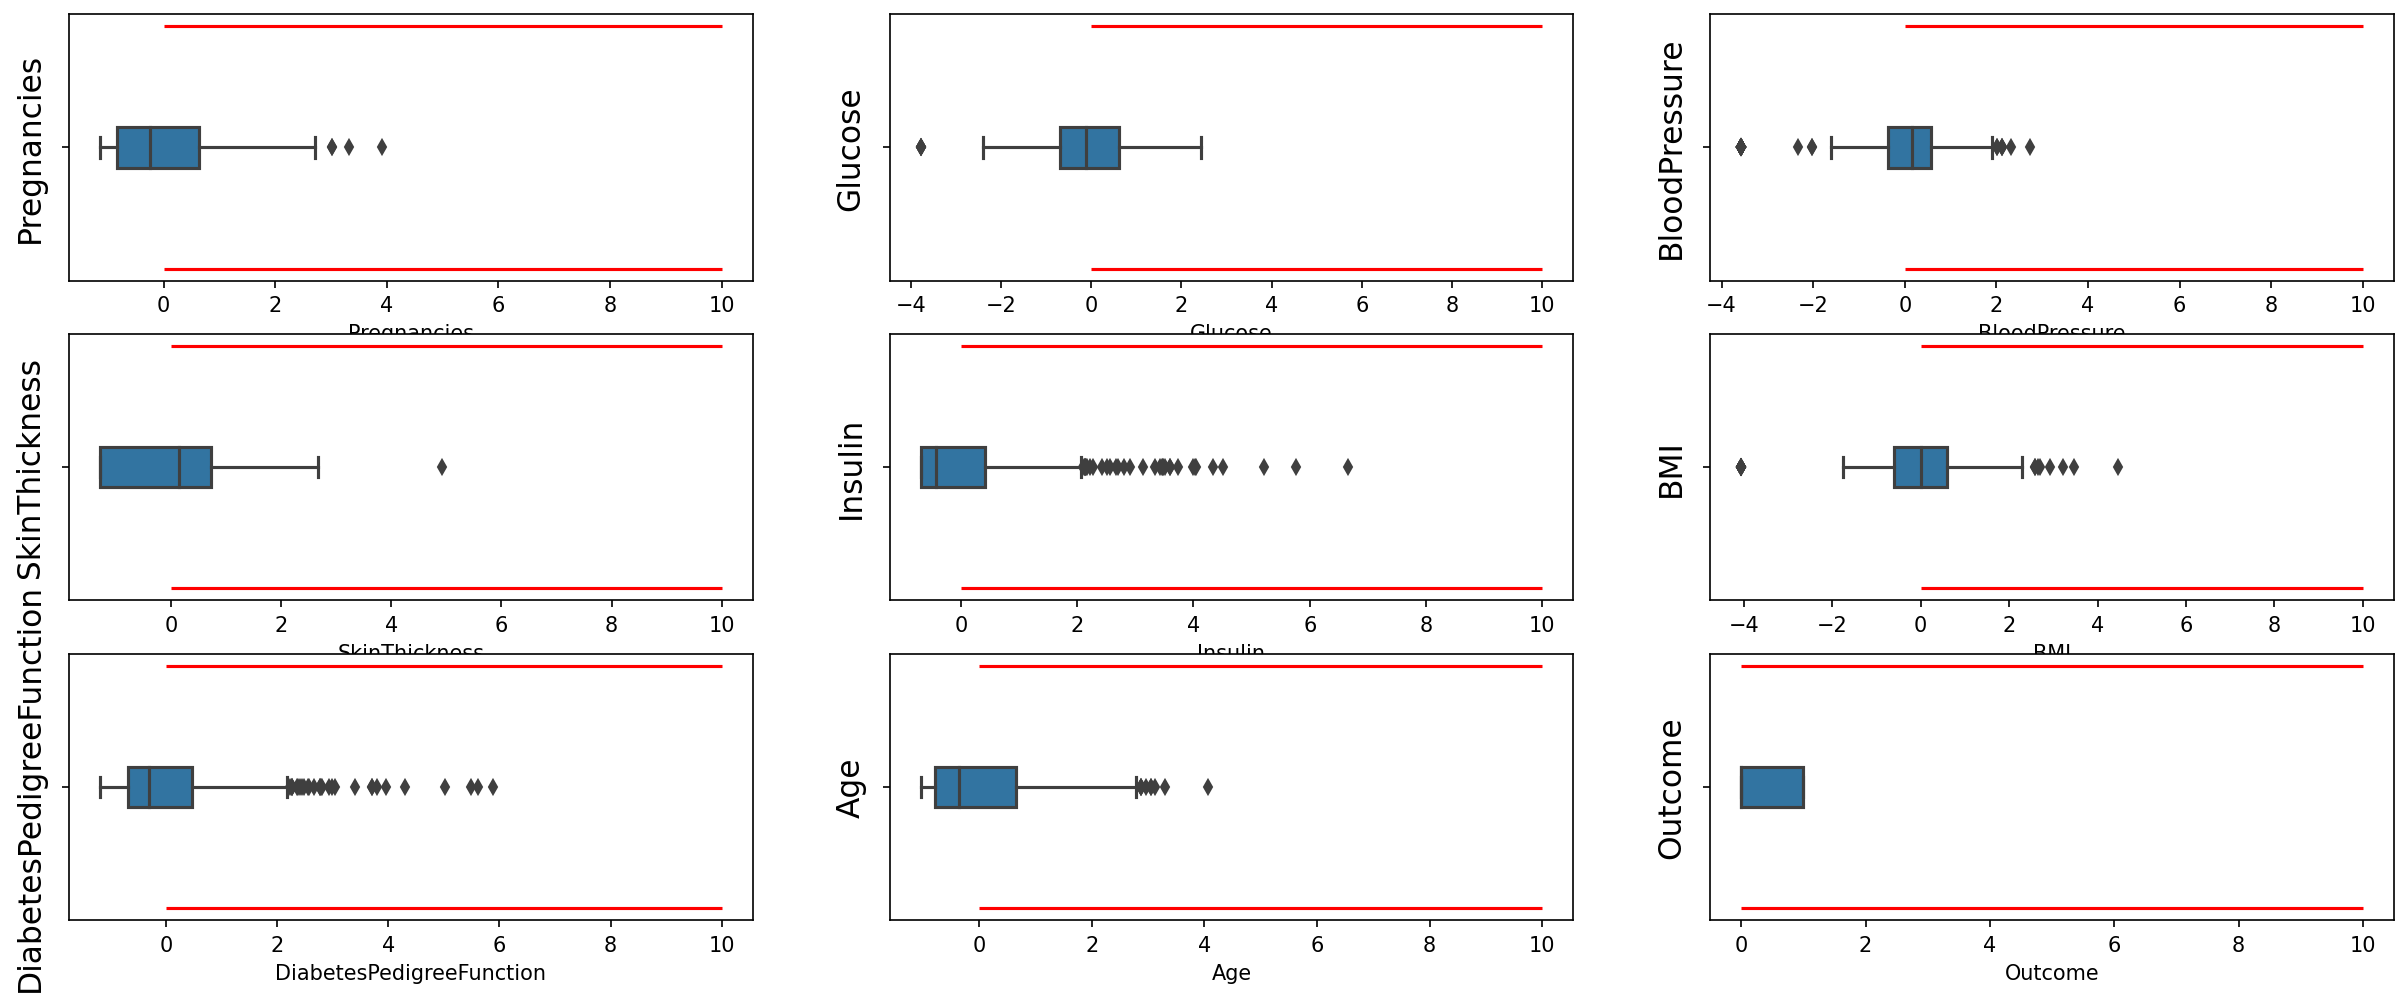

In [12]:
columns=data_2.columns.tolist()[:9]
fig = plt.figure(figsize=(20,8),dpi=150)
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.boxplot(data_2[columns[i]],orient='v',width=1)
    plt.ylabel(columns[i],fontsize=15)
    plt.hlines([-3,3],0,10,colors='r')
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

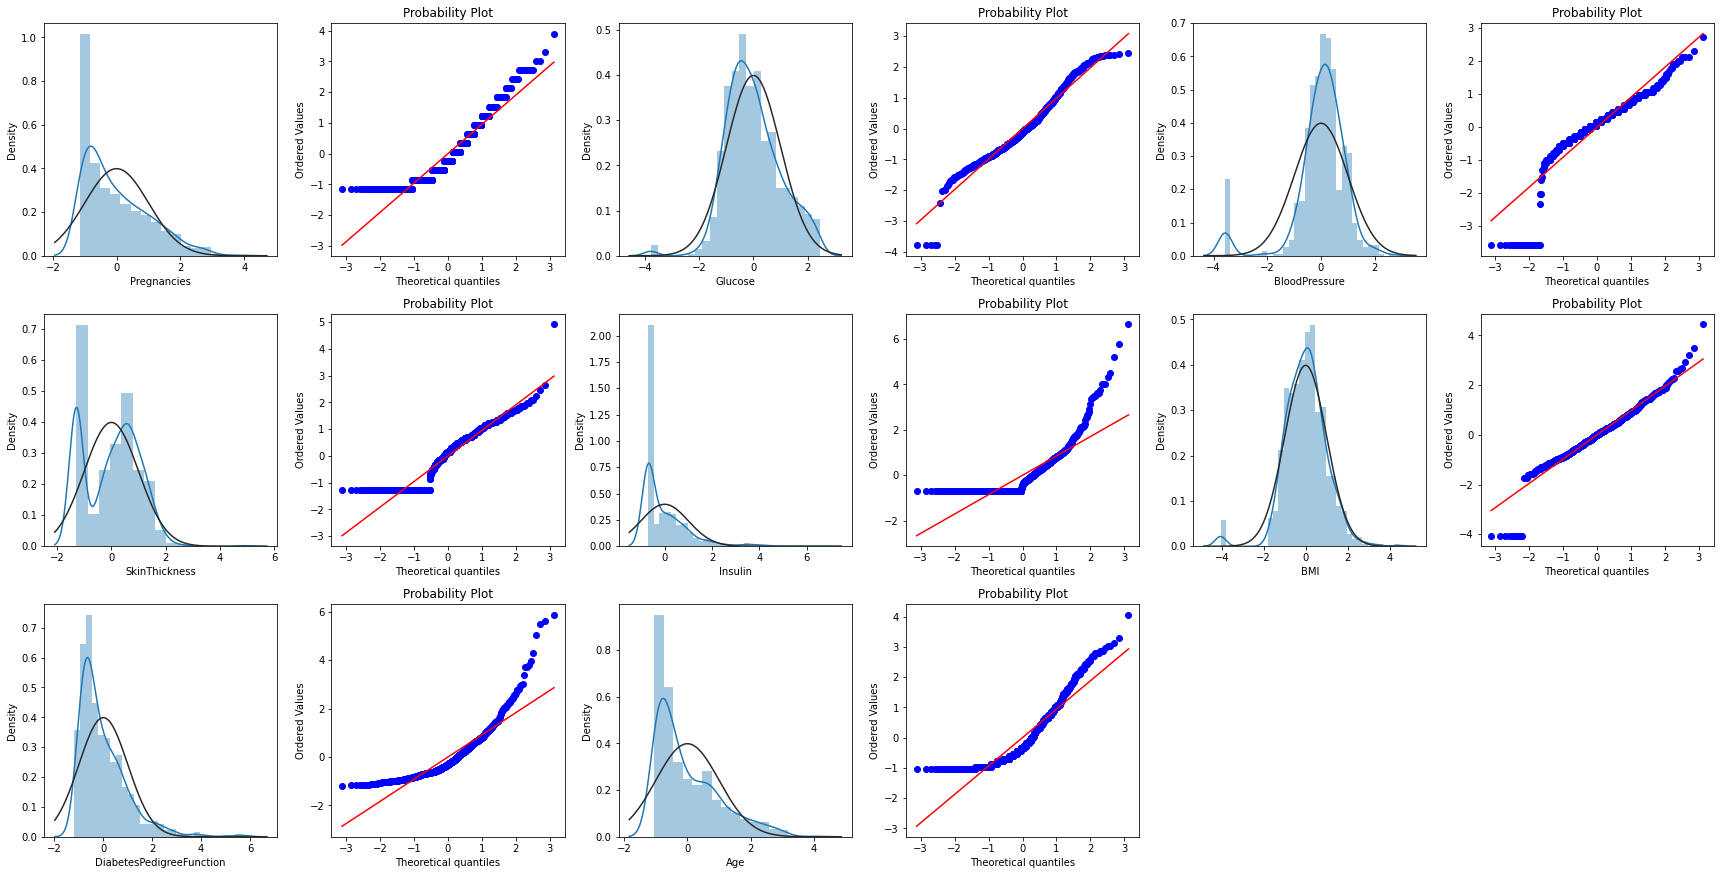

In [13]:
data_3 = data_2.copy()
data_3 = data_3.drop(columns=['Outcome'])
train_cols = 6
train_rows = len(data_3.columns)

plt.figure(figsize=(4*train_cols,4*train_rows))
i = 0
for col in data_3.columns:
    i+=1
    ax = plt.subplot(train_rows,train_cols,i)
    sns.distplot(data_3[col],fit=scipy.stats.norm)
    i+=1
    ax = plt.subplot(train_rows,train_cols,i)
    scipy.stats.probplot(data_3[col],plot=plt)
plt.tight_layout()
plt.show()
    

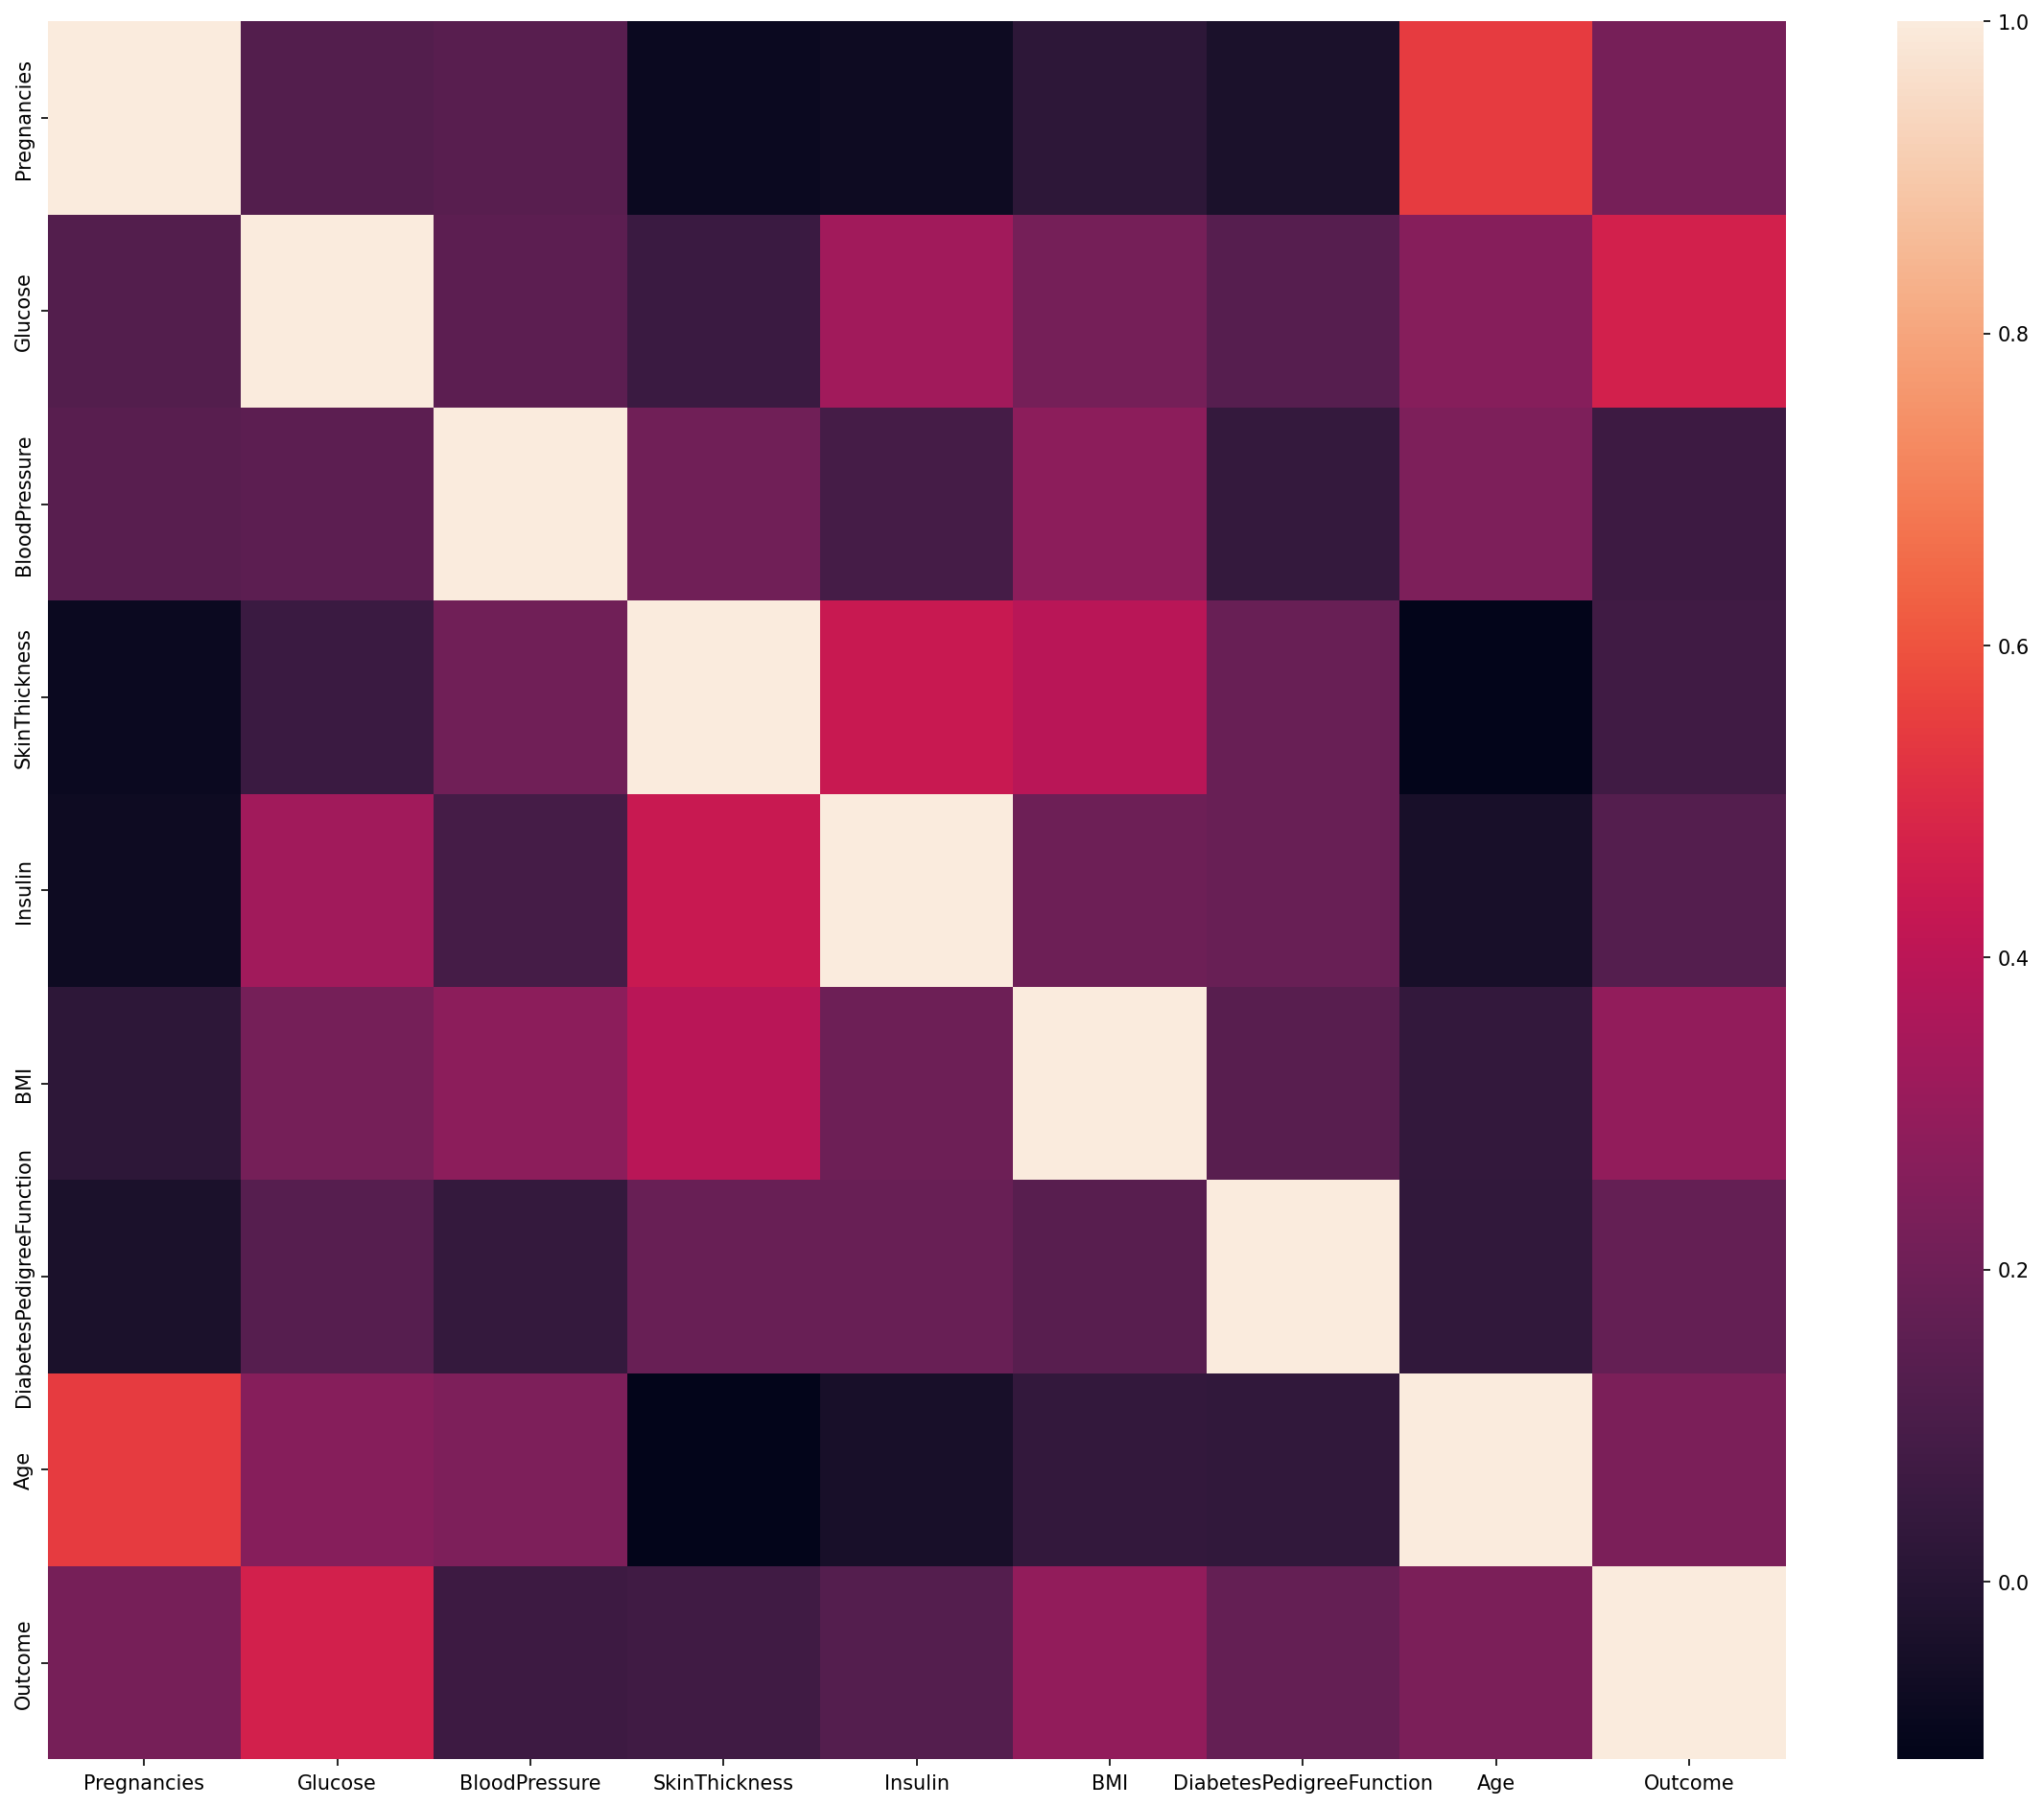

In [14]:
data_corr = data_2.corr()
ax = plt.subplots(figsize=(20,16),dpi=150)
ax = sns.heatmap(data_corr,vmax=1,square=True)

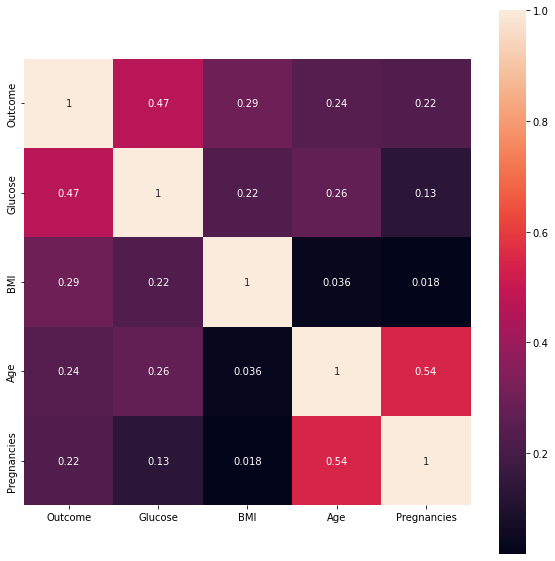

In [15]:
K = 5
cols = data_corr.nlargest(K,'Outcome')['Outcome'].index
cm = np.corrcoef(data_2[cols].values.T)
hm = plt.subplots(figsize=(10,10))
hm= sns.heatmap(data_2[cols].corr(),annot=True,square=True)
plt.show()

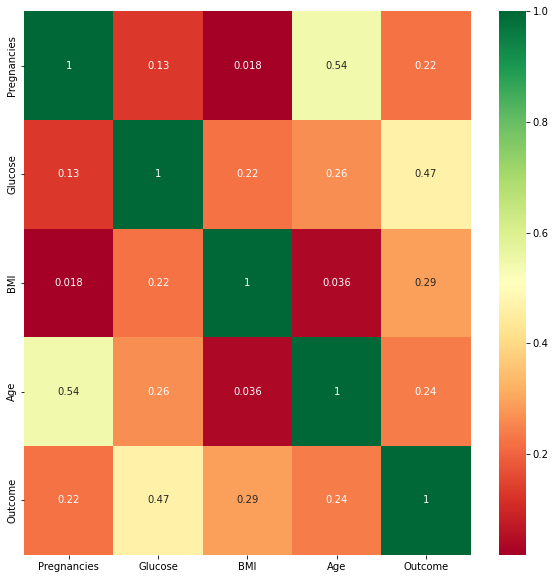

In [16]:
thresshold = 0.2
corrmat = data_2.corr()
top_corr_feature = corrmat.index[abs(corrmat['Outcome'])>thresshold]
plt.figure(figsize=(10,10))
g = sns.heatmap(data_2[top_corr_feature].corr(),
               annot=True,cmap="RdYlGn")


In [17]:
#x_train = data[top_corr_feature].drop(columns=['Outcome'])
top_corr_feature

Index(['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

In [18]:
data_2

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.468492  1.425995        1  
1                   -0.365061 -0.190672        0  
2                    0.604397 -0.105584        1  
3                   -0.920763 -1.041549        0  
4                    5.484909 -0.020496        1  
..                        ...       ...      ...  
763                 -0.908682  2.532136        0  
764                 -0.398282 -0.531023        0  
765                 -0.685193 -0.275760        0  
766                 -0.371101  1.170732        1  
767                 -0.473785 -0.871374        0  

[768 rows x 9 columns]

In [19]:
#x_train
data_3 = data_3.drop(columns=['BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction'])


In [20]:
#print(data_2)
#x_train = data_2.drop(columns=[8])
#y=data_2[8]
#data_2 = x_train
#data_3
y = target

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

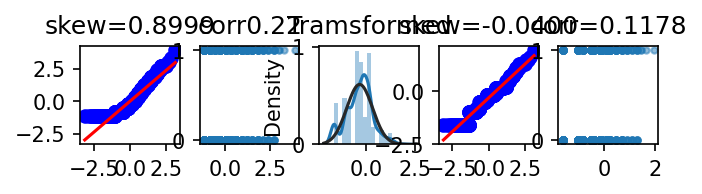

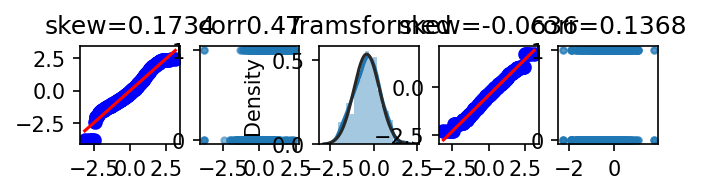

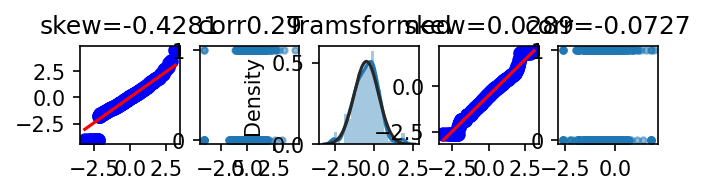

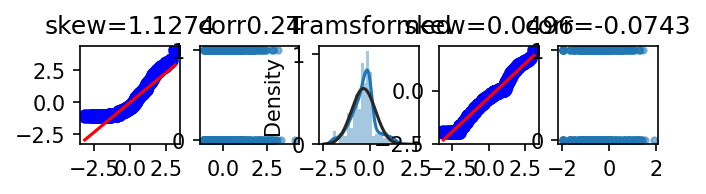

In [21]:
from scipy import stats
from scipy.stats import boxcox 
cols_numerics = list(data_3.columns)
trans_var_all = {}
i = 0
fcols = 6
frows = len(cols_numerics)
for val in list(data_3.columns):
    i+=1
    plt.figure(figsize=(fcols,frows),dpi=150)
    sns.distplot(data_3[val],fit=stats.norm)
    plt.title('Original')
    plt.xlabel('')
    i+=1
    
    plt.subplot(frows,fcols,i)
    _ = stats.probplot(data_3[val],plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(data_3[val])))
    plt.xlabel('')
    plt.ylabel('')
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(data_3[val],y,'.',alpha=0.5)
    plt.title('corr'+'{:.2f}'.format(np.corrcoef(data_3[val],y)[0][1]))
    i+=1
    plt.subplot(frows,fcols,i)
    trans_var,lambda_var = stats.boxcox(abs(data_3[val]))
    trans_var_all[val]=trans_var

    
    sns.distplot(trans_var,fit=stats.norm)
    plt.title('Tramsformed')
    plt.xlabel('')
    i+=1
    plt.subplot(frows,fcols,i)
    _ = stats.probplot(trans_var,plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_var,y,'.',alpha=0.5)
    plt.title('corr='+'{:.4f}'.format(np.corrcoef(trans_var,y)[0][1]))

In [22]:
trans_var_all = pd.DataFrame(trans_var_all)
trans_var_all

Pregnancies   Glucose       BMI       Age
0      -0.401070 -0.159319 -1.220701  0.381948
1      -0.161804  0.119042 -0.355213 -1.203170
2       0.221327  0.758861  0.099966 -1.469506
3      -0.161804 -0.001793 -0.625230  0.041051
4       0.137042 -0.601056  0.364787 -1.945077
..           ...       ...       ...       ...
763     0.701339 -0.432522 -1.518762  1.130493
764    -0.521305 -1.871960 -0.453880 -0.557579
765    -0.833439 -2.285085 -0.291722 -1.001091
766    -0.161804 -1.309349 -1.124093  0.162828
767    -0.161804 -0.132258 -1.226026 -0.133875

[768 rows x 4 columns]

In [23]:
trans_var_all=pd.DataFrame(trans_var_all)
trans_var_all


Pregnancies   Glucose       BMI       Age
0      -0.401070 -0.159319 -1.220701  0.381948
1      -0.161804  0.119042 -0.355213 -1.203170
2       0.221327  0.758861  0.099966 -1.469506
3      -0.161804 -0.001793 -0.625230  0.041051
4       0.137042 -0.601056  0.364787 -1.945077
..           ...       ...       ...       ...
763     0.701339 -0.432522 -1.518762  1.130493
764    -0.521305 -1.871960 -0.453880 -0.557579
765    -0.833439 -2.285085 -0.291722 -1.001091
766    -0.161804 -1.309349 -1.124093  0.162828
767    -0.161804 -0.132258 -1.226026 -0.133875

[768 rows x 4 columns]

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [25]:
train_data, test_data, train_target, test_target = train_test_split(
    trans_var_all,target,test_size=0.2,random_state=0)

In [26]:
clf = LinearRegression()
clf.fit(train_data,train_target)
score = mean_squared_error(test_target,clf.predict(test_data))
print("LinearRegression",score)

LinearRegression 0.21202994898737565


In [27]:
#top_corr_feature = top_corr_feature.drop(columns=['Outcome'])
#type(trans_var_all)
#trans_var_all.columns=list(top_corr_feature)
#trans_var_all = trans_var_all.dropna(1)


In [28]:
trans_var_all

Pregnancies   Glucose       BMI       Age
0      -0.401070 -0.159319 -1.220701  0.381948
1      -0.161804  0.119042 -0.355213 -1.203170
2       0.221327  0.758861  0.099966 -1.469506
3      -0.161804 -0.001793 -0.625230  0.041051
4       0.137042 -0.601056  0.364787 -1.945077
..           ...       ...       ...       ...
763     0.701339 -0.432522 -1.518762  1.130493
764    -0.521305 -1.871960 -0.453880 -0.557579
765    -0.833439 -2.285085 -0.291722 -1.001091
766    -0.161804 -1.309349 -1.124093  0.162828
767    -0.161804 -0.132258 -1.226026 -0.133875

[768 rows x 4 columns]

In [29]:
for val in trans_var_all.columns:
    print('variable{} and Outcome t-test results below：'.format(val))
    print(stats.ttest_ind(trans_var_all[val], target))
    print("---------------------------------------------------")
    print('variable{} and Outcome ANOVA results below：'.format(val))
    print(stats.f_oneway(trans_var_all[val], target))
    print("---------------------------------------------------")

variablePregnancies and Outcome t-test results below：
Ttest_indResult(statistic=-22.582083700705308, pvalue=1.0159087214196817e-97)
---------------------------------------------------
variablePregnancies and Outcome ANOVA results below：
F_onewayResult(statistic=509.95050426566064, pvalue=1.0159087214192576e-97)
---------------------------------------------------
variableGlucose and Outcome t-test results below：
Ttest_indResult(statistic=-23.90788683430874, pvalue=1.2363793886972141e-107)
---------------------------------------------------
variableGlucose and Outcome ANOVA results below：
F_onewayResult(statistic=571.5870528821135, pvalue=1.2363793886967377e-107)
---------------------------------------------------
variableBMI and Outcome t-test results below：
Ttest_indResult(statistic=-25.81868093929124, pvalue=2.3228283340056816e-122)
---------------------------------------------------
variableBMI and Outcome ANOVA results below：
F_onewayResult(statistic=666.6042854449206, pvalue=2.3228

In [31]:
#import pingouin as pg
#import statsmodels as api
#from statsmodels.formula.api import ols
#from bioinfokit.analys import stat
#aov = pg.anova(data=trans_var_all, dv='weight',between='group',detailed=True)